### This is a notebook for comparing predicted segmentation with ground truth segmentations

In [19]:
import numpy as np
from cellpose import utils, dynamics, metrics
from numba import jit
from scipy.optimize import linear_sum_assignment
from scipy.ndimage import convolve, mean




In [20]:
x = "tile_0002_0029_seg.npy"

print(x.split('_')[-2][2:])



29


In [21]:

print((x.split('_')[-3] + x.split('_')[-2][2:]).strip('0'))

229


### Loading of *_seg.npy files which contains 

In [22]:
import numpy as np
import glob
import re

# Path to directory containing .npy files
groundtruth_files_path = "../data/validation/groundtruth/"
predicted_files_path = "../data/validation/predictions/"

# Get list of all .npy files in the directory and sort them in numerical order
groundtruth_files = sorted(
    glob.glob(f"{groundtruth_files_path}/*.npy"),
    key=lambda x: int(x.split('_')[-3].lstrip('0') + x.split('_')[-2][2:].lstrip('0'))
)
predicted_files = sorted(
    glob.glob(f"{predicted_files_path}/*.npy"),
    key=lambda x: int(x.split('_')[-3].lstrip('0') + x.split('_')[-2][2:].lstrip('0'))
)

# Load each .npy file into a list and extract only the 'masks' field
groundtruth_list = [np.load(file, allow_pickle=True).item()['masks'] for file in groundtruth_files]
predicted_list = [np.load(file, allow_pickle=True).item()['masks'] for file in predicted_files]

print("Number of .npy files loaded:", len(groundtruth_list))

# Accessing the 'masks' directly from the lists
masks_true = groundtruth_list
masks_pred = predicted_list

#print(groundtruth_files[10])

#The file nr you want ot visualise
i = 13

tile = re.search(r'tile_\d{4}_\d{4}', groundtruth_files[i])
tile = tile.group()
print(tile)

Number of .npy files loaded: 20
tile_0029_0010


In [6]:
avr_precision = metrics.average_precision(masks_true, masks_pred)
#print("average precision:", avr_precision)


In [7]:

import matplotlib.pyplot as plt

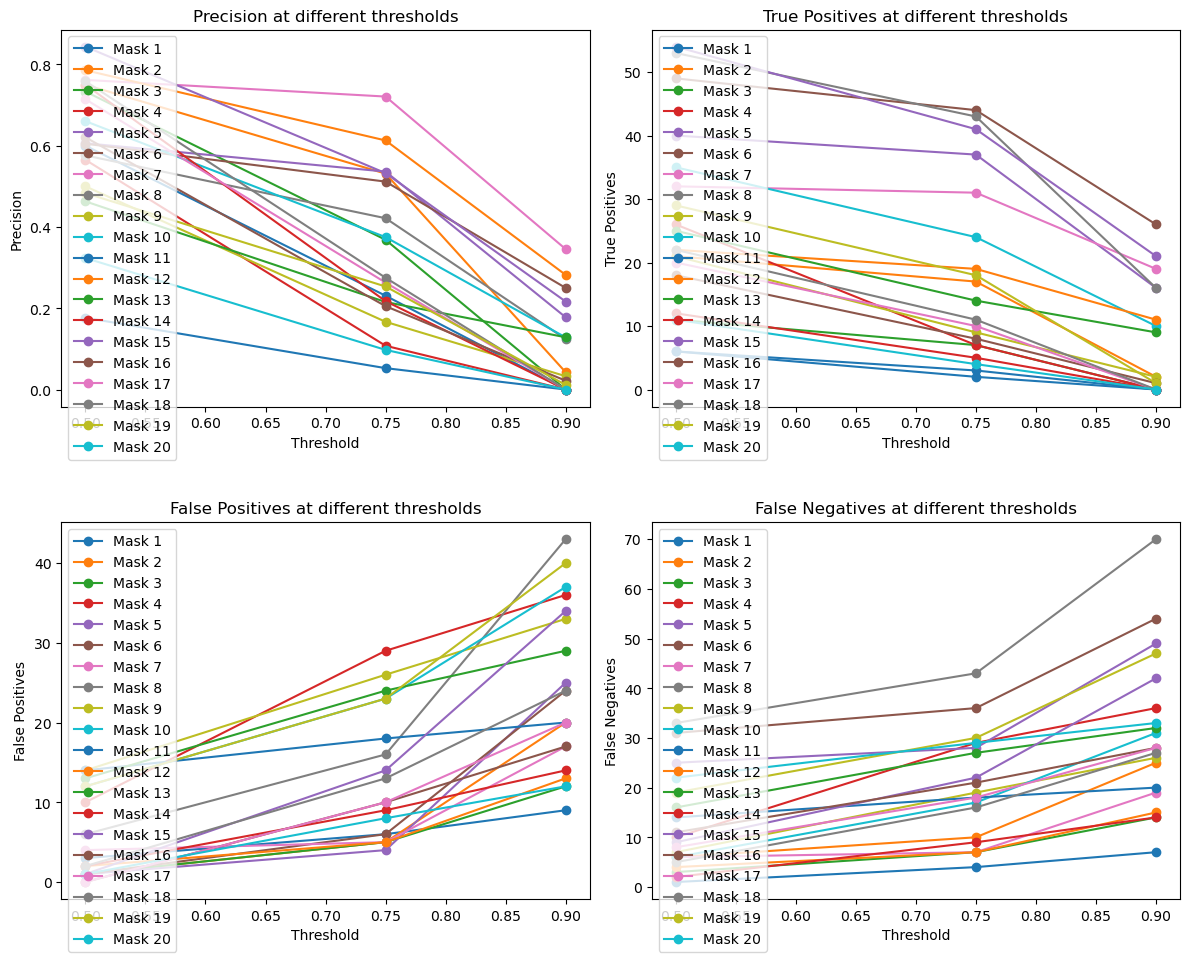

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import metrics

# Assuming you already have masks_true and masks_pred defined
# You can compute the average precision as follows:
avr_precision = metrics.average_precision(masks_true, masks_pred)

# Extract values from the output
precision = avr_precision[0]  # Precision at different thresholds
tp = avr_precision[1]         # True Positives at different thresholds
fp = avr_precision[2]         # False Positives at different thresholds
fn = avr_precision[3]         # False Negatives at different thresholds

# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Precision at different thresholds
axs[0, 0].plot([0.5, 0.75, 0.9], precision.T, marker='o')
axs[0, 0].set_title('Precision at different thresholds')
axs[0, 0].set_xlabel('Threshold')
axs[0, 0].set_ylabel('Precision')
axs[0, 0].legend([f'Mask {i+1}' for i in range(precision.shape[0])], loc='upper left')

# Plot 2: True Positives at different thresholds
axs[0, 1].plot([0.5, 0.75, 0.9], tp.T, marker='o')
axs[0, 1].set_title('True Positives at different thresholds')
axs[0, 1].set_xlabel('Threshold')
axs[0, 1].set_ylabel('True Positives')
axs[0, 1].legend([f'Mask {i+1}' for i in range(tp.shape[0])], loc='upper left')

# Plot 3: False Positives at different thresholds
axs[1, 0].plot([0.5, 0.75, 0.9], fp.T, marker='o')
axs[1, 0].set_title('False Positives at different thresholds')
axs[1, 0].set_xlabel('Threshold')
axs[1, 0].set_ylabel('False Positives')
axs[1, 0].legend([f'Mask {i+1}' for i in range(fp.shape[0])], loc='upper left')

# Plot 4: False Negatives at different thresholds
axs[1, 1].plot([0.5, 0.75, 0.9], fn.T, marker='o')
axs[1, 1].set_title('False Negatives at different thresholds')
axs[1, 1].set_xlabel('Threshold')
axs[1, 1].set_ylabel('False Negatives')
axs[1, 1].legend([f'Mask {i+1}' for i in range(fn.shape[0])], loc='upper left')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


## Making plots of all three models precision

In [23]:
# Path to directory containing .npy files
groundtruth_files_path = "../data/validation/groundtruth/"
predicted_retrained_path = "../data/validation/predictions/"
predicted_finetuned_path = "../data/validation_fine_cyto/fined_tuned_predictions/"
predicted_cyto3_path = "../data/validation_fine_cyto/cyto3_predictions/"

# Get list of all .npy files in the directory and sort them in numerical order
groundtruth_files = sorted(
    glob.glob(f"{groundtruth_files_path}/*.npy"),
    key=lambda x: int(x.split('_')[-3].lstrip('0') + x.split('_')[-2][2:].lstrip('0'))
)
predicted_retrained_files = sorted(
    glob.glob(f"{predicted_retrained_path}/*.npy"),
    key=lambda x: int(x.split('_')[-3].lstrip('0') + x.split('_')[-2][2:].lstrip('0'))
)

predicted_finetuned_files = sorted(
    glob.glob(f"{predicted_finetuned_path}/*.npy"),
    key=lambda x: int(x.split('_')[-3].lstrip('0') + x.split('_')[-2][2:].lstrip('0'))
)

predicted_cyto3_files = sorted(
    glob.glob(f"{predicted_cyto3_path}/*.npy"),
    key=lambda x: int(x.split('_')[-3].lstrip('0') + x.split('_')[-2][2:].lstrip('0'))
)

# Load each .npy file into a list and extract only the 'masks' field
groundtruth_list = [np.load(file, allow_pickle=True).item()['masks'] for file in groundtruth_files]
predicted_retrained_list = [np.load(file, allow_pickle=True).item()['masks'] for file in predicted_retrained_files]
predicted_finetuned_list = [np.load(file, allow_pickle=True).item()['masks'] for file in predicted_finetuned_files]
predicted_cyto3_list = [np.load(file, allow_pickle=True).item()['masks'] for file in predicted_cyto3_files]

print("Number of .npy files loaded:", len(groundtruth_list))

# Accessing the 'masks' directly from the lists
masks_true = groundtruth_list
masks_retrained = predicted_retrained_list
masks_finetuned = predicted_finetuned_list
masks_cyto3 = predicted_cyto3_list

Number of .npy files loaded: 20


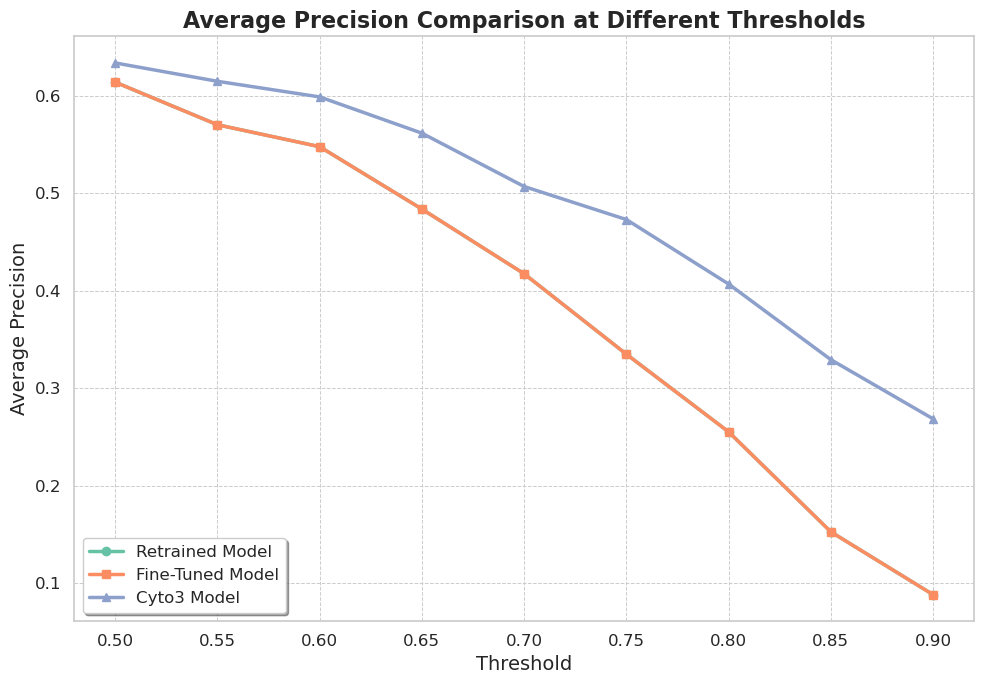

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cellpose import metrics

# Assuming you already have these lists defined
# masks_true = groundtruth_list
# masks_retrained = predicted_retrained_list
# masks_finetuned = predicted_finetuned_list
# masks_cyto3 = predicted_cyto3_list
thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
# Compute average precision for each prediction set
avr_precision_retrained = metrics.average_precision(masks_true, masks_retrained, thresholds)
avr_precision_finetuned = metrics.average_precision(masks_true, masks_finetuned, thresholds)
avr_precision_cyto3 = metrics.average_precision(masks_true, masks_cyto3, thresholds)

# Extract precision values
precision_retrained = np.mean(avr_precision_retrained[0], axis=0)
precision_finetuned = np.mean(avr_precision_finetuned[0], axis=0)
precision_cyto3 = np.mean(avr_precision_cyto3[0], axis=0)

# Thresholds used for evaluation


# Set up the plot with Seaborn styling
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2")

plt.figure(figsize=(10, 7))

# Plot precision for each model
plt.plot(thresholds, precision_retrained, marker='o', label='Retrained Model', color=palette[0], linewidth=2.5)
plt.plot(thresholds, precision_finetuned, marker='s', label='Fine-Tuned Model', color=palette[1], linewidth=2.5)
plt.plot(thresholds, precision_cyto3, marker='^', label='Cyto3 Model', color=palette[2], linewidth=2.5)

# Add labels, title, and legend
plt.title('Average Precision Comparison at Different Thresholds', fontsize=16, weight='bold')
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Average Precision', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=12, frameon=True, shadow=True)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7)

# Save and show the plot
plt.tight_layout()
plt.show()

## Aggregated jaccard index

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import metrics

# Assuming you already have masks_true and masks_pred defined
# Calculate the aggregated Jaccard index (this is a scalar value representing overlap)
aggregated_jaccard = metrics.aggregated_jaccard_index(masks_true, masks_pred)
print(aggregated_jaccard)

[0.51575376 0.66072643 0.63823009 0.56786038 0.66626738 0.68526298
 0.75948111 0.54771524 0.49446747 0.62307692 0.38264475 0.77170092
 0.51273917 0.6242685  0.74406727 0.40381382 0.61051568 0.69359346
 0.48024347 0.31770018]


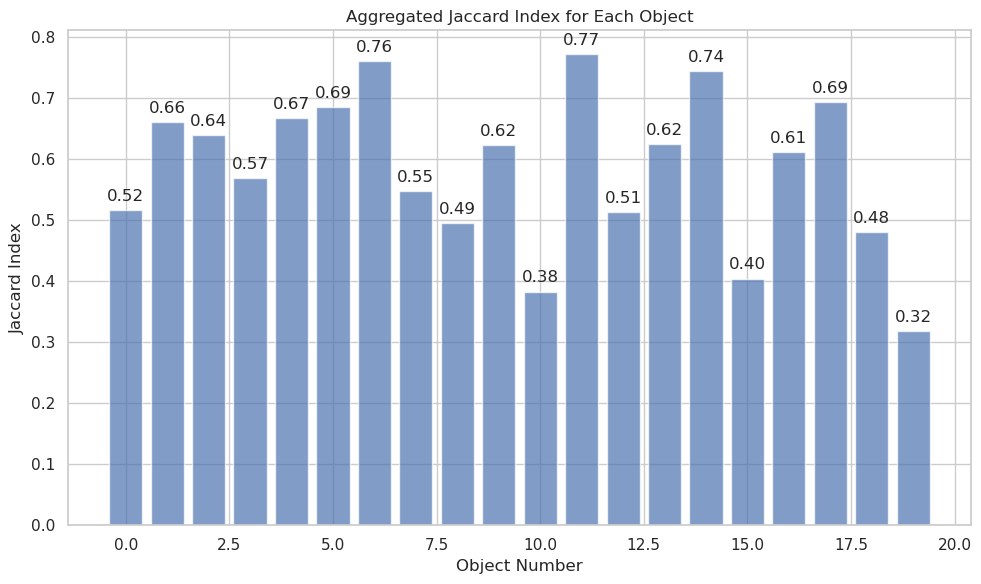

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import metrics

# Assuming you already have masks_true and masks_pred defined
# Calculate the aggregated Jaccard index (returns an array of values for each object)
aggregated_jaccard = metrics.aggregated_jaccard_index(masks_true, masks_pred)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the aggregated Jaccard index for each object as a bar plot
plt.bar(np.arange(len(aggregated_jaccard)), aggregated_jaccard, color='b', alpha=0.7)

# Add a title and labels
plt.title('Aggregated Jaccard Index for Each Object')
plt.xlabel('Object Number')
plt.ylabel('Jaccard Index')

# Optionally, display the aggregated Jaccard index as text on the plot
for i, value in enumerate(aggregated_jaccard):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


## Boundary Scores

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import metrics

scales = [0.5]

# Assuming you already have masks_true, masks_pred, and scales defined
# Calculate the boundary scores (precision, recall, and F-score)
boundary_scores = metrics.boundary_scores(masks_true, masks_pred, scales)

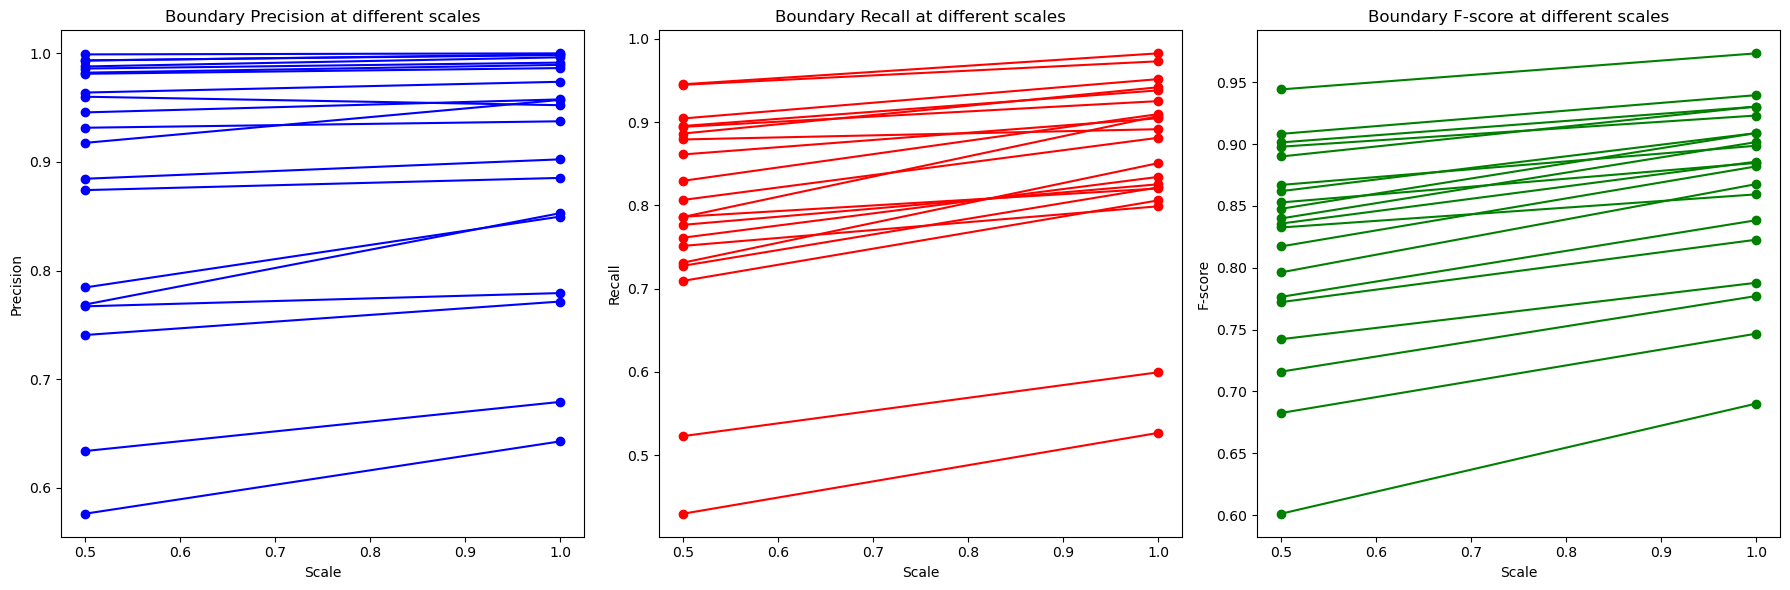

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import metrics

scales = [0.5, 1.0]

# Assuming you already have masks_true, masks_pred, and scales defined
# Calculate the boundary scores (precision, recall, and F-score)
boundary_scores = metrics.boundary_scores(masks_true, masks_pred, scales)

# Extract values from the output
precision_boundary = boundary_scores[0]  # Boundary precision at different scales
recall_boundary = boundary_scores[1]    # Boundary recall at different scales
fscore_boundary = boundary_scores[2]    # Boundary F-score at different scales

# Set up the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Boundary Precision at different scales
axs[0].plot(scales, precision_boundary, marker='o', color='b')
axs[0].set_title('Boundary Precision at different scales')
axs[0].set_xlabel('Scale')
axs[0].set_ylabel('Precision')

# Plot 2: Boundary Recall at different scales
axs[1].plot(scales, recall_boundary, marker='o', color='r')
axs[1].set_title('Boundary Recall at different scales')
axs[1].set_xlabel('Scale')
axs[1].set_ylabel('Recall')

# Plot 3: Boundary F-score at different scales
axs[2].plot(scales, fscore_boundary, marker='o', color='g')
axs[2].set_title('Boundary F-score at different scales')
axs[2].set_xlabel('Scale')
axs[2].set_ylabel('F-score')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### The following is for plotting the images with masks

In [28]:
import numpy as np
from cellpose import plot, utils, io
dat = np.load(groundtruth_files_path + tile + '_seg.npy', allow_pickle=True).item()
img = io.imread('../data/validation/raw/' + tile + ".png")


dat.keys()


dict_keys(['outlines', 'colors', 'masks', 'chan_choose', 'filename', 'flows', 'ismanual', 'manual_changes', 'model_path', 'flow_threshold', 'cellprob_threshold', 'normalize_params', 'restore', 'ratio', 'diameter'])

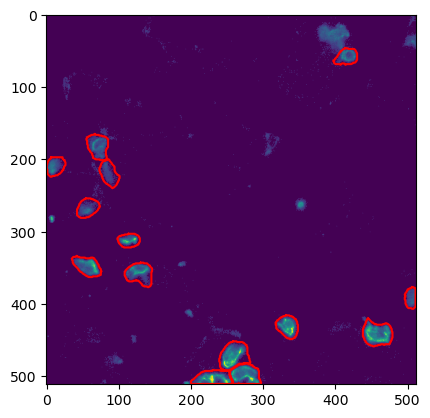

In [14]:
import numpy as np
from cellpose import plot, utils, io


dat1 = np.load(groundtruth_files_path + tile +'_seg.npy', allow_pickle=True).item()
dat2 = np.load(predicted_files_path + tile + '_seg.npy', allow_pickle=True).item()

img = io.imread('../data/validation/raw/' + tile + ".png")

# plot image with masks overlaid
mask_RGB = plot.mask_overlay(img, dat['masks'])

# plot image with outlines overlaid in red
outlines = utils.outlines_list(dat['masks'])
plt.imshow(img)
for o in outlines:
    plt.plot(o[:,0], o[:,1], color='r')

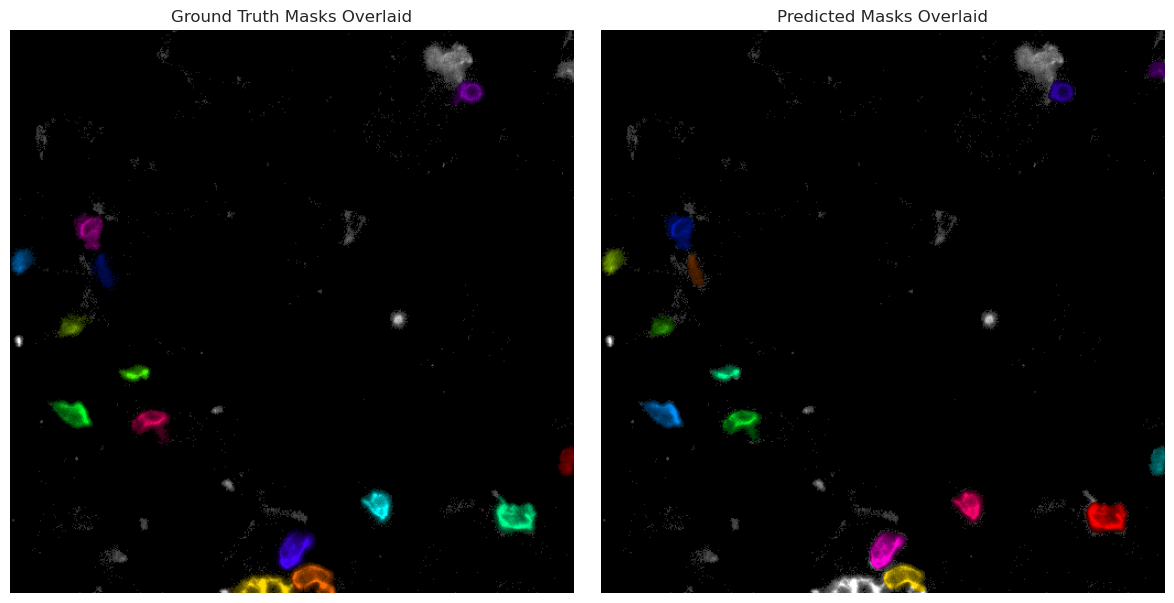

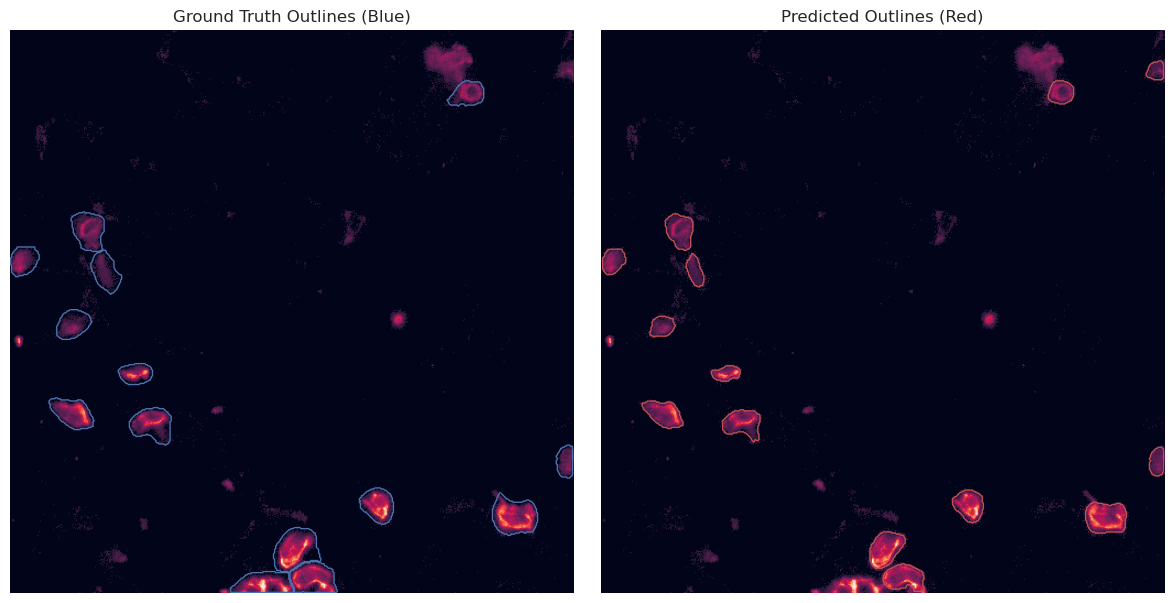

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import plot, utils, io

# Load the ground truth and predicted masks
dat1 = np.load(groundtruth_files_path + tile +'_seg.npy', allow_pickle=True).item()  # Ground truth
dat2 = np.load(predicted_files_path + tile + '_seg.npy', allow_pickle=True).item()  # Predicted

# Load the image
img = io.imread('../data/validation/raw/' + tile + ".png")

# Set up the plot for side-by-side comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the ground truth masks overlay (using 'dat1') on the left side
mask_RGB_gt = plot.mask_overlay(img, dat1['masks'])
axs[0].imshow(mask_RGB_gt)
axs[0].set_title("Ground Truth Masks Overlaid")
axs[0].axis('off')  # Turn off axis for better visualization

# Plot the predicted masks overlay (using 'dat2') on the right side
mask_RGB_pred = plot.mask_overlay(img, dat2['masks'])
axs[1].imshow(mask_RGB_pred)
axs[1].set_title("Predicted Masks Overlaid")
axs[1].axis('off')  # Turn off axis for better visualization

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Now, plot outlines for both ground truth (dat1) and predicted (dat2)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Get outlines for ground truth (dat1) and predicted masks (dat2)
outlines_gt = utils.outlines_list(dat1['masks'])  # Outlines for ground truth
outlines_pred = utils.outlines_list(dat2['masks'])  # Outlines for predicted masks

# Plot ground truth outlines (blue) on the left side
axs[0].imshow(img)
for o in outlines_gt:
    axs[0].plot(o[:, 0], o[:, 1], color='b', lw=1)
axs[0].set_title("Ground Truth Outlines (Blue)")
axs[0].axis('off')

# Plot predicted outlines (red) on the right side
axs[1].imshow(img)
for o in outlines_pred:
    axs[1].plot(o[:, 0], o[:, 1], color='r', lw=1)
axs[1].set_title("Predicted Outlines (Red)")
axs[1].axis('off')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the outline comparison plot
plt.show()


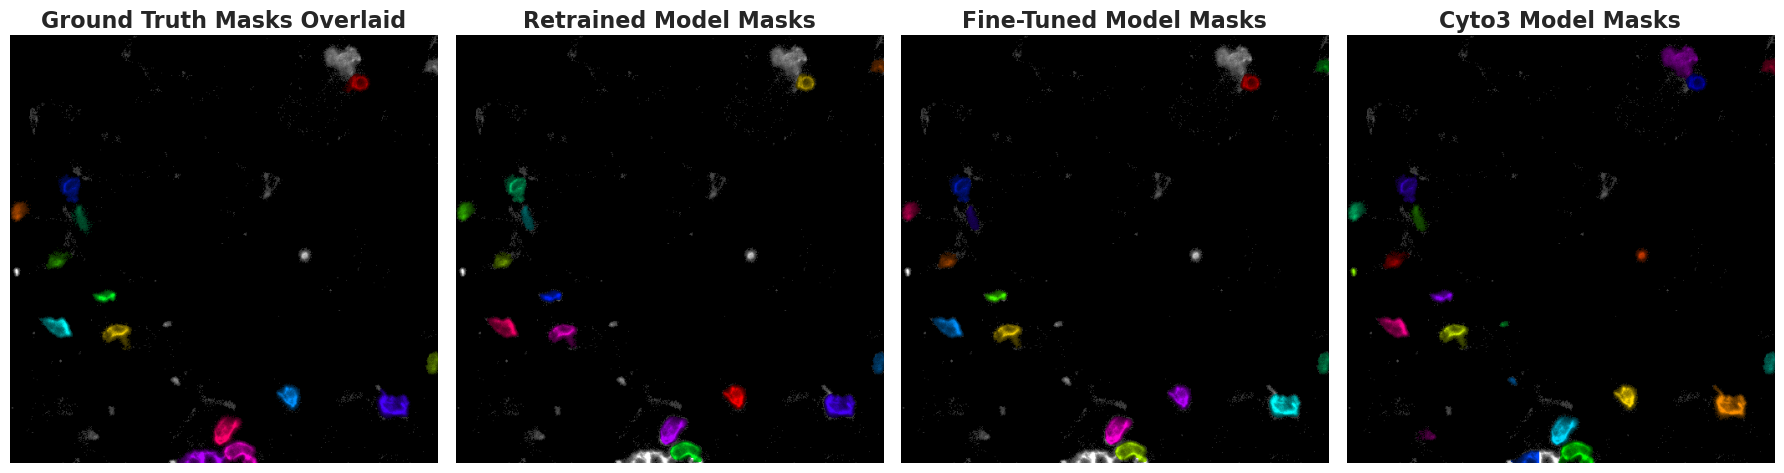

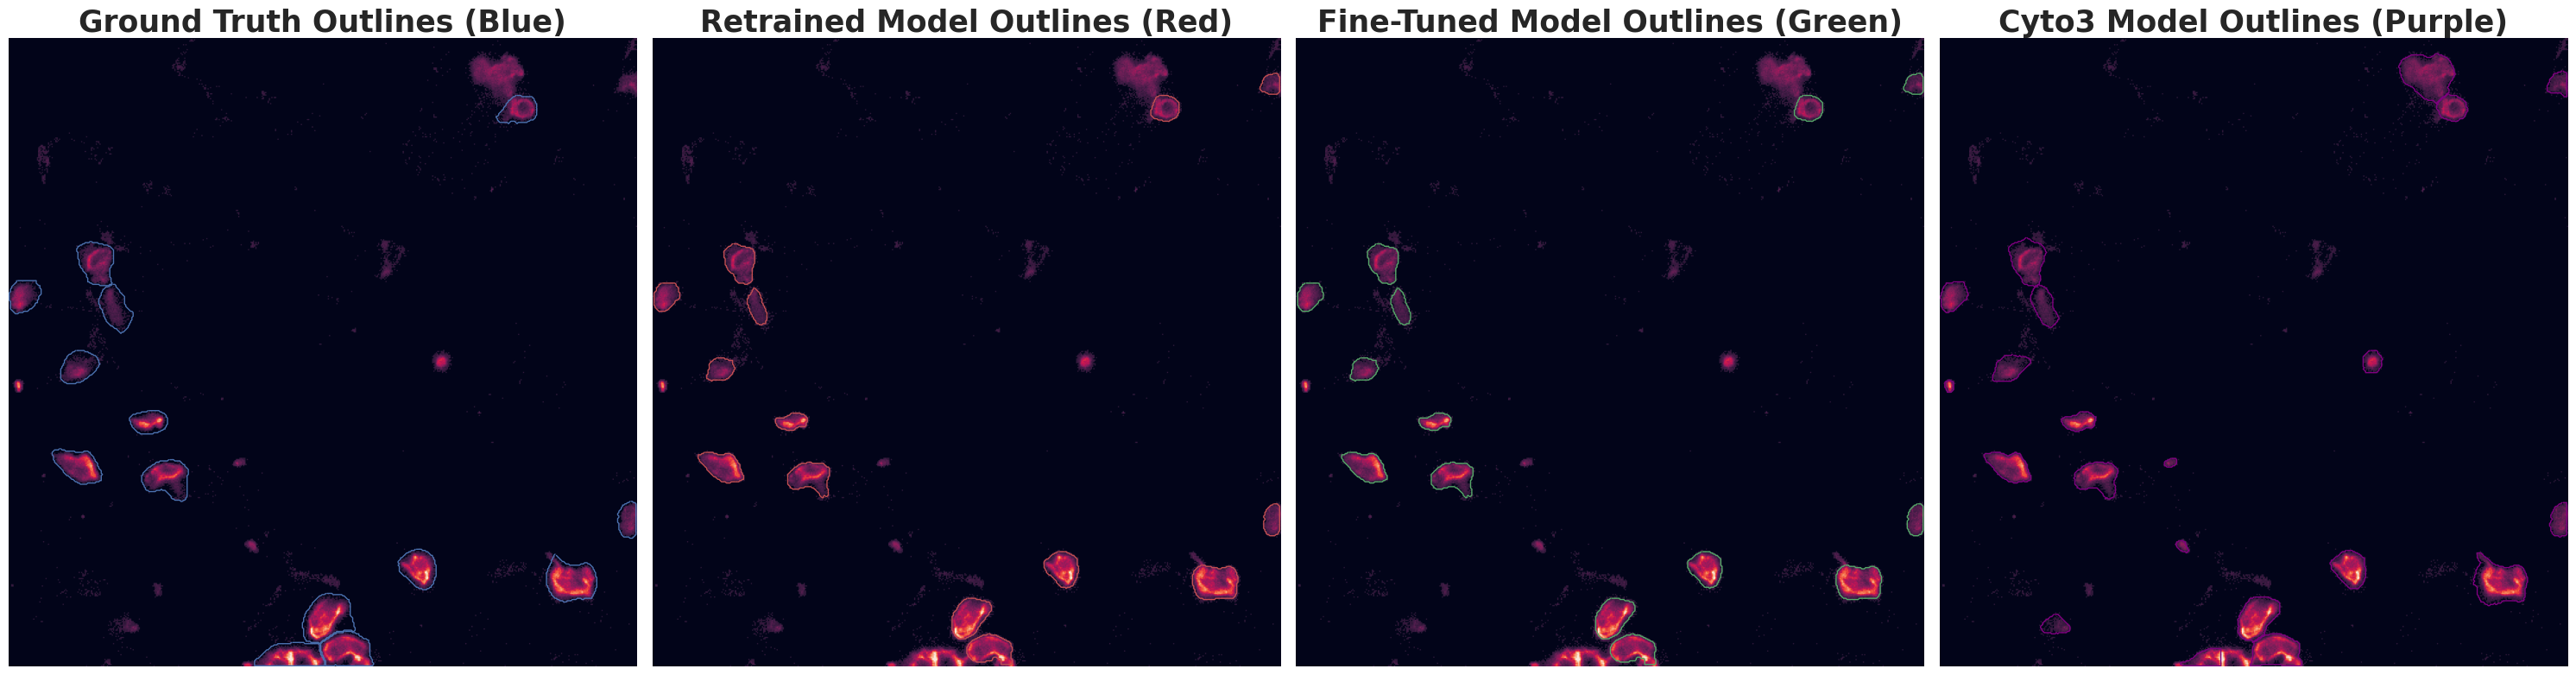

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import plot, utils, io

# Assuming you have paths to the ground truth and predicted masks for all three models
# Load ground truth
dat1 = np.load(groundtruth_files_path + tile + '_seg.npy', allow_pickle=True).item()  # Ground truth

# Load predicted masks for each model
dat_retrained = np.load(predicted_retrained_path + tile + '_seg.npy', allow_pickle=True).item()  # Retrained
dat_finetuned = np.load(predicted_finetuned_path + tile + '_seg.npy', allow_pickle=True).item()  # Fine-tuned
dat_cyto3 = np.load(predicted_cyto3_path + tile + '_seg.npy', allow_pickle=True).item()  # Cyto3

# Load the image
img = io.imread('../data/validation/raw/' + tile + ".png")

# Set up the plot for side-by-side comparison of masks
fig, axs = plt.subplots(1, 4, figsize=(18, 6))

# Define font properties for bold and larger titles
font_properties = {'weight': 'bold', 'size': 16}

# Plot the ground truth masks overlay (using 'dat1') on the first subplot
mask_RGB_gt = plot.mask_overlay(img, dat1['masks'])
axs[0].imshow(mask_RGB_gt)
axs[0].set_title("Ground Truth Masks Overlaid", fontdict=font_properties)
axs[0].axis('off')  # Turn off axis for better visualization

# Plot the retrained model predicted masks overlay on the second subplot
mask_RGB_retrained = plot.mask_overlay(img, dat_retrained['masks'])
axs[1].imshow(mask_RGB_retrained)
axs[1].set_title("Retrained Model Masks", fontdict=font_properties)
axs[1].axis('off')

# Plot the fine-tuned model predicted masks overlay on the third subplot
mask_RGB_finetuned = plot.mask_overlay(img, dat_finetuned['masks'])
axs[2].imshow(mask_RGB_finetuned)
axs[2].set_title("Fine-Tuned Model Masks", fontdict=font_properties)
axs[2].axis('off')

# Plot the cyto3 model predicted masks overlay on the fourth subplot
mask_RGB_cyto3 = plot.mask_overlay(img, dat_cyto3['masks'])
axs[3].imshow(mask_RGB_cyto3)
axs[3].set_title("Cyto3 Model Masks", fontdict=font_properties)
axs[3].axis('off')

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()

# Now, plot outlines for ground truth and all predicted masks
fig, axs = plt.subplots(1, 4, figsize=(30, 10))

font_properties = {'weight': 'bold', 'size': 25}
# Get outlines for ground truth (dat1) and predicted masks
outlines_gt = utils.outlines_list(dat1['masks'])  # Outlines for ground truth
outlines_retrained = utils.outlines_list(dat_retrained['masks'])  # Outlines for retrained model
outlines_finetuned = utils.outlines_list(dat_finetuned['masks'])  # Outlines for fine-tuned model
outlines_cyto3 = utils.outlines_list(dat_cyto3['masks'])  # Outlines for cyto3 model

# Plot ground truth outlines (blue) on the first subplot
axs[0].imshow(img)
for o in outlines_gt:
    axs[0].plot(o[:, 0], o[:, 1], color='b', lw=1)
axs[0].set_title("Ground Truth Outlines (Blue)", fontdict=font_properties)
axs[0].axis('off')

# Plot retrained model outlines (red) on the second subplot
axs[1].imshow(img)
for o in outlines_retrained:
    axs[1].plot(o[:, 0], o[:, 1], color='r', lw=1)
axs[1].set_title("Retrained Model Outlines (Red)", fontdict=font_properties)
axs[1].axis('off')

# Plot fine-tuned model outlines (green) on the third subplot
axs[2].imshow(img)
for o in outlines_finetuned:
    axs[2].plot(o[:, 0], o[:, 1], color='g', lw=1)
axs[2].set_title("Fine-Tuned Model Outlines (Green)", fontdict=font_properties)
axs[2].axis('off')

# Plot cyto3 model outlines (purple) on the fourth subplot
axs[3].imshow(img)
for o in outlines_cyto3:
    axs[3].plot(o[:, 0], o[:, 1], color='purple', lw=1)
axs[3].set_title("Cyto3 Model Outlines (Purple)", fontdict=font_properties)
axs[3].axis('off')

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()
